# Data Mining: Clustering Techniques, K-Means
## Jessica Schmidt

# PART I: Research Question
## A1. Research Question and K-Means Clustering Technique
Can we find determine whether any clusters exist between Patient Income and Patient Total Charge in the medical dataset via the K-Means clustering technique and, if so, can we determine the characteristics of said clusters?

## A2. Goal of the Analysis
The goal of the analysis is to successfully perform a k-means clustering technique analysis and to determine the optimal number of clusters for the research question from A1.

# PART II: Technique Justification
## B1. How the Clustering Technique Analyzes the Dataset and Expected Outcomes
The k-means clustering technique will analyze the dataset by looking at Patient Income and Patient Total Charge variables to determine the optimal number of clusters in the dataset and help determine if any clusters exist that can then inform a potential course of action.

The k-means algorithm categorizes data into k groups or clusters of similarity. To calculate this similarity, k-means uses the Euclidean distance as a measurement. First, "we randomly initialize k points (called means or clusters." Then, "We categorize each item to its closest mean and we update the mean's coordinates which are the averages of the items categorized in that cluster so far." And finally, "we repeat the process for a given number of iterations and at the end, we have our clusters." (Source: Geeks for Geeks)

The expected outcome of this analysis is that we will discover if there are any clusters present between Patient Income and Patient Total Charge via k-means clustering that perhaps cannot be seen at first cursory data exploration. The main objective/outcome of k-means is "essentially a grouping of things based on how similar and different they are to one another." (Source: Geeks for Geeks)

## B2. Assumption of the Clustering Technique
K-means assumes that "the variance of the distribution of each attribute (variable) is spherical; all variables have the same variance; the prior probability for all k clusters are the same, i.e. each cluster has roughly equal number of observations". (Source: Variance Explained)

## B3. Packages and Libraries to Support Analysis (Source: D212 Webinars)

In [1]:
# Importing Relevant Packages

# Standard Packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization imports for data exploration
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Scikit-Learn standard scaler to normalize data to prepare for analysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scikit-Learn KMeans Algorithm to fit the data
from sklearn.cluster import KMeans

# Scikit-LearnSilhouette score to evaluate analysis
from sklearn.metrics import silhouette_score


In [2]:
# Import CSV File
df = pd.read_csv('/Users/astro/Downloads/medical_clean.csv')

# Examine the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# Print the header
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df.describe(include = 'all').round(2)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00,10000,10000,10000,10000,10000,10000,10000.00,10000.00,10000.00,...,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
unique,NaN,10000,10000,10000,6072,52,1607,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Houston,TX,Jefferson,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,1,36,553,118,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50,NaN,NaN,NaN,NaN,NaN,NaN,50159.32,38.75,-91.24,...,5312.17,12934.53,3.52,3.51,3.51,3.52,3.50,3.52,3.49,3.51
std,2886.90,NaN,NaN,NaN,NaN,NaN,NaN,27469.59,5.40,15.21,...,2180.39,6542.60,1.03,1.03,1.03,1.04,1.03,1.03,1.02,1.04
min,1.00,NaN,NaN,NaN,NaN,NaN,NaN,610.00,17.97,-174.21,...,1938.31,3125.70,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2500.75,NaN,NaN,NaN,NaN,NaN,NaN,27592.00,35.26,-97.35,...,3179.37,7986.49,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
50%,5000.50,NaN,NaN,NaN,NaN,NaN,NaN,50207.00,39.42,-88.40,...,5213.95,11573.98,4.00,3.00,4.00,4.00,3.00,4.00,3.00,3.00
75%,7500.25,NaN,NaN,NaN,NaN,NaN,NaN,72411.75,42.04,-80.44,...,7459.70,15626.49,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00


# PART III: Data Preparation
## C1. Data Preprocessing Goal
One data preprocessing goal necessary for the k-means clustering analysis technique is to normalize the data.

## C2. Initial Dataset Variables for Analysis
The initial dataset variables for the analysis are Patient Income ("Income") and Patient Total Charge (TotalCharge). Both of these are continuous variables.

## C3. Steps to Prepare the Data for Analysis and Code
The steps necessary to prepare the data for analysis are to isolate the two variables from the initial cleaned dataset and to create a new dataframe with them. In this case, please see the code below C4 for the creation of the new kmeans_df dataframe. Please note that the normalized dataframe will also be created with code found below and it will also be submitted as part of this PA.

## C4. Copy of the Prepared Dataset
Please see the copy of the prepared dataset that is being submitted as part of this PA.

In [5]:
kmeans_df = df[['Income', 'TotalCharge']]

kmeans_df.to_csv('/Users/astro/Downloads/kmeans_df.csv', index=False)

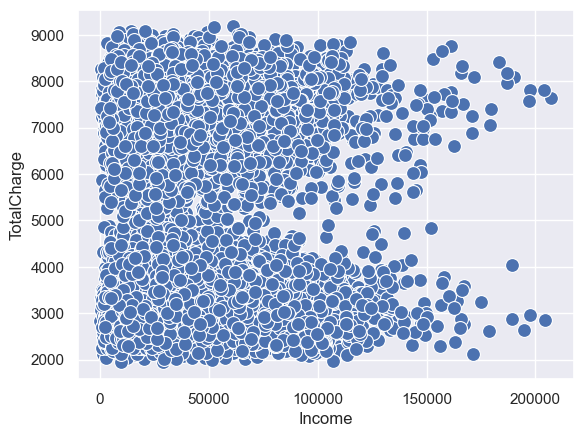

In [6]:
# Optimal number of clusters appears to be two according to the scatterplot
# Data Visualizations of chosen variables for further exploration
ax = sns.scatterplot(data = df,
                    x = 'Income',
                    y = 'TotalCharge',
                    s = 100)

In [7]:
# Data Preprocessing
clusterdata = df[['Income', 'TotalCharge']].describe().round(2)
clusterdata

,Income,TotalCharge
count,10000.00,10000.00
mean,40490.50,5312.17
std,28521.15,2180.39
min,154.08,1938.31
25%,19598.78,3179.37
50%,33768.42,5213.95
75%,54296.40,7459.70
max,207249.10,9180.73


In [8]:
# Normalizing Data using Z-Scores with StandardScaler from sklearn
scaled_df = scaler.fit_transform(df[['Income', 'TotalCharge']])
scaled_df

array([[ 1.61591429, -0.72718477],
       [ 0.22144303, -0.51322759],
       [-0.91586974, -1.31998284],
       ...,
       [ 0.89156936,  1.35959679],
       [-0.37827063,  1.06972732],
       [ 0.77813279,  1.18121275]])

In [9]:
scaled_df = pd.DataFrame(scaled_df, columns = ['Income', 'TotalCharge'])
scaled_df

,Income,TotalCharge
0,1.615914,-0.727185
1,0.221443,-0.513228
2,-0.915870,-1.319983
3,-0.026263,-1.460517
4,-1.377325,-1.467285
...,...,...
9995,0.192047,0.705765
9996,-0.894380,1.114312
9997,0.891569,1.359597
9998,-0.378271,1.069727


In [10]:
# Exploring the Normalized Data
scaled_df.describe().round(2)

,Income,TotalCharge
count,10000.00,10000.00
mean,0.00,0.00
std,1.00,1.00
min,-1.41,-1.55
25%,-0.73,-0.98
50%,-0.24,-0.05
75%,0.48,0.98
max,5.85,1.77


In [11]:
# Creating CSV file of the normalized dataframe
scaled_df.to_csv('/Users/astro/Downloads/scaledkmeans_df.csv', index=False)

# PART IV: Analysis
## D1. Optimal Number of Clusters and Method to Determine
During data exploration above, as noted above, I created a scatterplot of the two chosen variables and it was discovered that there initially appears to be two distinct clusters. The WCSSE/Elbow and Silhouette Score methods are used to further refine the optimal number of clusters, and from the results below, we can see that the best number of clusters is 3.

## D2. Code to Perform Clustering Analysis (Source: D212 Webinars)
To perform the k means clustering analysis, I will be using the following code with the KMeans algorithm from Scikit-Learn:

In [12]:
k_model = KMeans(n_clusters = 2, n_init = 25, random_state = 300)

k_model.fit(scaled_df)

KMeans(n_clusters=2, n_init=25, random_state=300)

In [13]:
evaluate = pd.Series(k_model.labels_).value_counts()
evaluate

0    5026
1    4974
dtype: int64

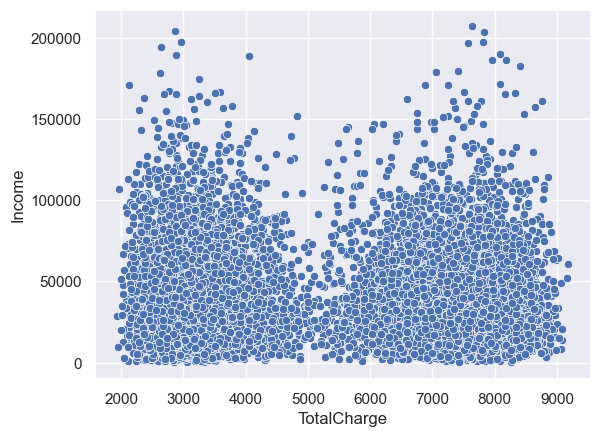

In [14]:
ax = sns.scatterplot(data = df,
                    x = 'TotalCharge',
                    y = 'Income')

In [15]:
# Create and visualize centroids to better understand the data
centroid = pd.DataFrame(k_model.cluster_centers_,
                        columns = ['Income', 'TotalCharge'])

centroid

,Income,TotalCharge
0,0.008418,-0.942281
1,-0.008510,0.952513


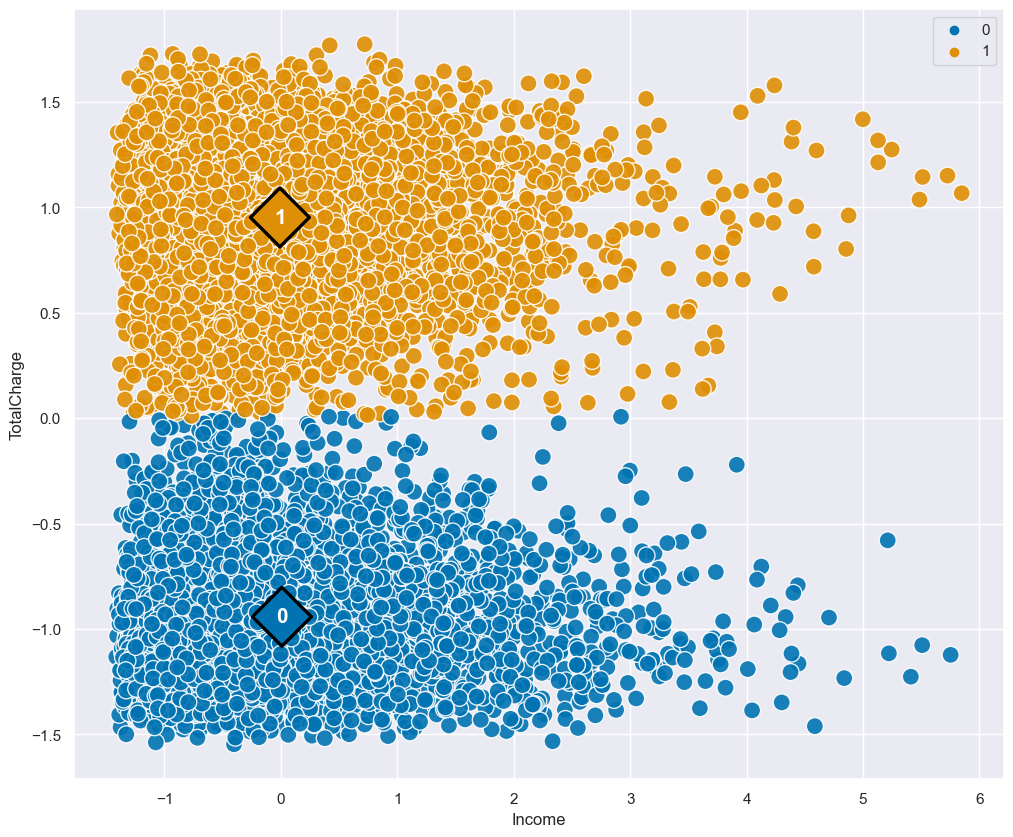

In [16]:
plt.figure(figsize = (12, 10))

ax = sns.scatterplot(data = scaled_df,
                    x = 'Income',
                    y = 'TotalCharge',
                    hue = k_model.labels_,
                    palette = 'colorblind',
                    alpha = 0.9,
                    s = 150,
                    legend = True)

ax = sns.scatterplot(data = centroid,
                    x = 'Income',
                    y = 'TotalCharge',
                    hue = centroid.index,
                    palette = 'colorblind',
                    s = 900,
                    marker = 'D',
                    ec = 'black',
                    legend = False)

for i in range(len(centroid)):
                plt.text(x = centroid.Income[i],
                        y = centroid.TotalCharge[i],
                        s = i,
                        horizontalalignment = 'center',
                        verticalalignment = 'center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

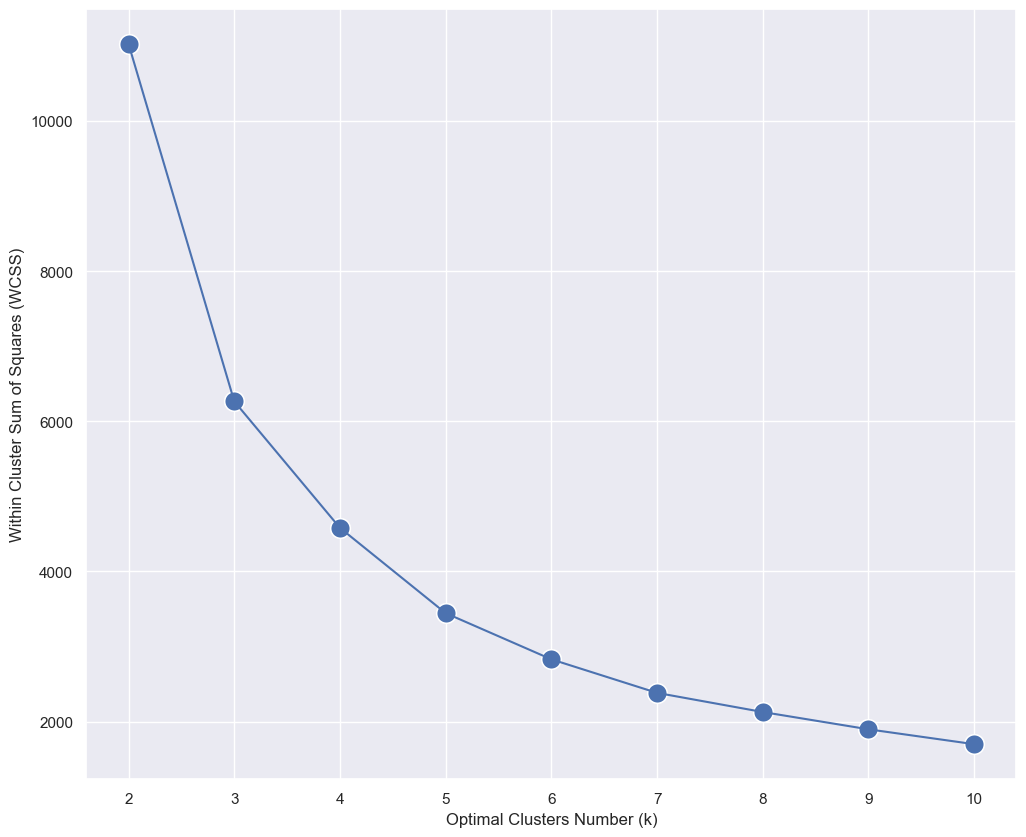

In [17]:
# Choosing k optimal values (source: D212 Webinars)
# Elbow method
# Results are not very clear, will try sillhouette method instead
wcss = []
for k in range(2,11):
    model = KMeans(n_clusters = k, n_init = 50, random_state = 300)
    model.fit(scaled_df)
    wcss.append(model.inertia_)
wcss_s = pd.Series(wcss, index = range(2,11))

plt.figure(figsize = (12, 10))
ax = sns.lineplot(y = wcss_s, x = wcss_s.index)
ax = sns.scatterplot(y = wcss_s, x = wcss_s.index, s = 200)
ax = ax.set(xlabel = 'Optimal Clusters Number (k)',
           ylabel = 'Within Cluster Sum of Squares (WCSS)')

In [18]:
# Silhouette Method
# Results are better than elbow, 3 clusters are optimal
silhouette_score1 = silhouette_score(scaled_df, k_model.labels_)
silhouette_score1

0.48548052885382076

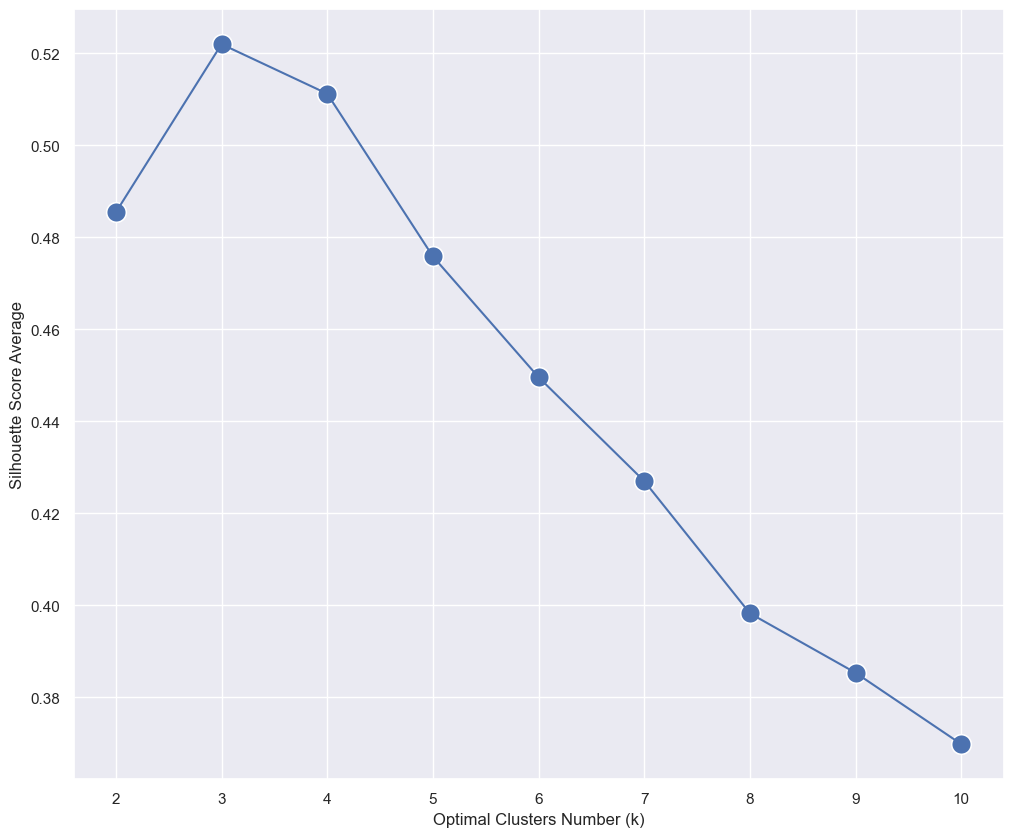

In [19]:
silhouette = []
for k in range (2, 11):
    model = KMeans(n_clusters = k, n_init = 25, random_state = 300)
    model.fit(scaled_df)
    silhouette.append(silhouette_score(scaled_df, model.labels_))
    
silhouette_s = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize = (12, 10))
ax = sns.lineplot(y = silhouette_s, x = silhouette_s.index)
ax = sns.scatterplot(y = silhouette_s, x = silhouette_s.index, s = 200)
ax = ax.set(xlabel = 'Optimal Clusters Number (k)',
            ylabel = 'Silhouette Score Average')

# PART V: Data Summary and Implications
## E1. Quality of the Created Clusters
The quality of the created clusters is better having used the silhouette method to determine the optimal number of clusters. From the code below, we can see that the silhouette score is now 0.52 or 52% as compared to the initial score of 0.485 or 48.5%. Essentially, since the silhouette score can range from -1 to 1, with the higher the score being the better, we can tell that our new higher score of 52% is better than 48.5%.

In [20]:
# Final Model
fin_model = KMeans(n_clusters = 3, n_init = 25, random_state = 300)
fin_model.fit(scaled_df)

KMeans(n_clusters=3, n_init=25, random_state=300)

In [21]:
centroid = pd.DataFrame(fin_model.cluster_centers_,
                        columns = ['Income', 'TotalCharge'])
centroid

,Income,TotalCharge
0,-0.336102,-0.948244
1,-0.323370,0.967796
2,1.808531,-0.068533


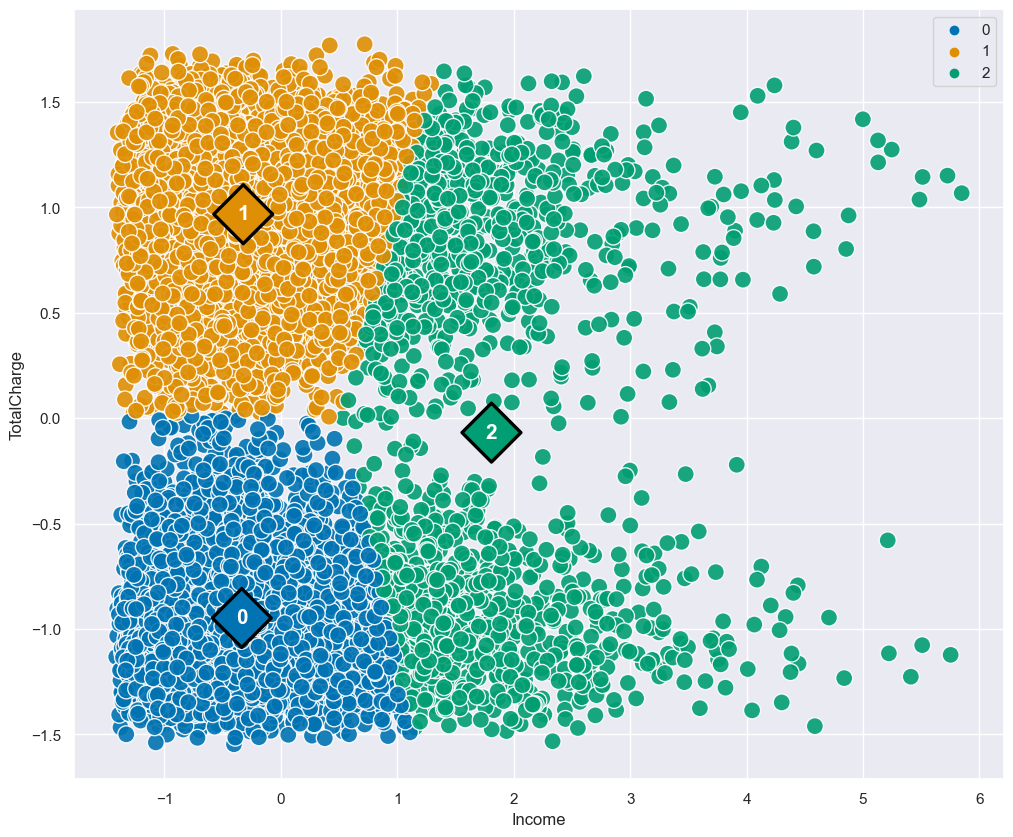

In [22]:
plt.figure(figsize = (12, 10))

ax = sns.scatterplot(data = scaled_df,
                    x = 'Income',
                    y = 'TotalCharge',
                    hue = fin_model.labels_,
                    palette = 'colorblind',
                    alpha = 0.9,
                    s = 150,
                    legend = True)

ax = sns.scatterplot(data = centroid,
                    x = 'Income',
                    y = 'TotalCharge',
                    hue = centroid.index,
                    palette = 'colorblind',
                    s = 900,
                    marker = 'D',
                    ec = 'black',
                    legend = False)

for i in range(len(centroid)):
                plt.text(x = centroid.Income[i],
                        y = centroid.TotalCharge[i],
                        s = i,
                        horizontalalignment = 'center',
                        verticalalignment = 'center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

In [23]:
silhouette_score2 = silhouette_score(scaled_df, fin_model.labels_)
silhouette_score2

0.5220247220647468

## E2. Results and Implications
The results of the analysis can be seen in the centroid results from above. For centroid 0, we can see that lower Patient Income clusters with lower Patient Charge. 

For centroid 1, we can see that lower Patient Income is clustered with higher Total Charge. 

And, finally, we can see in centroid 2 that higher Patient Income clusters with lower Total Charge.

## E3. Discussion of Limitation
One limitation of this analysis is that the results of the elbow method were not very clear and could have potentially suggested that a higher number of clusters would be optimal. However, I further tried the silhouette method, and it was very clear in that 3 clusters is the optimal number of clusters.

Another potential limitation of the analysis is that we only have 10000 records. Perhaps if we had a larger dataset, we could get more robust results from this analysis.

## E4. Recommended Course of Action for A1 Based on E2
Given that we were seeking if there were any clusters between Patient Income and Total Charge in A1, we can see that there are indeed clusters between these variables given the results noted in part E2. Particularly, we can see that lower Patient Income is clustered with both lower and higher Total Charge and higher Patient Income is clustered with lower Total Charge. I believe that this could potentially be problematic for patients with lower income since they are having to spend more on the higher Total Charge cases. Also, it seems that patients with higher income have lower Total Charge, and this could also suggest further issues.

Given the results, my recommended course of action is to further investigate why patients with lower incomes are being charged more and why patients with higher incomes are being charged less, and to reconcile this disconnect (or to at least see if we can lower charges for lower income patients).